In [1]:
!pip install youtube_dl -q

import youtube_dl

link = "https://www.youtube.com/watch?v=zK_Y75M_BmI"

ydl_opts = {}

with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    info_dict = ydl.extract_info(link, download=False)
    video_title = info_dict.get('title', None)

# path = f'./{video_title}.mp4'
path = f'./news.mp4'

ydl_opts.update({'outtmpl':path})

with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download([link])

[youtube] zK_Y75M_BmI: Downloading webpage
[youtube] zK_Y75M_BmI: Downloading webpage


[download] ./news.mp4.mkv has already been downloaded and merged


In [2]:
!ls

news.mp4.mkv  sample_data  temp.png  thres.png	tmp_labeled_news.mp4.mkv


In [3]:
import imageio
from PIL import Image
import cv2
import numpy as np
import os
import subprocess
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import seaborn as sns
# from IPython.display import Video, display
import warnings
warnings.filterwarnings("ignore")

In [4]:
video_name = "news.mp4.mkv"
video_name

'news.mp4.mkv'

In [5]:
video_path = f"../content/{video_name}"

In [7]:
VIDEO_CODEC = "MP4V"
video_name = os.path.basename(video_path)
vidcap = cv2.VideoCapture(video_path)
fps = vidcap.get(cv2.CAP_PROP_FPS)
width = int(vidcap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(vidcap.get(cv2.CAP_PROP_FRAME_HEIGHT))
output_path = "labeled_" + video_name
tmp_output_path = "tmp_" + output_path
output_video = cv2.VideoWriter(tmp_output_path, cv2.VideoWriter_fourcc(*VIDEO_CODEC), fps, (width, height))


In [8]:
video_name, fps, height, width

('news.mp4.mkv', 29.97002997002997, 1080, 1920)

In [12]:
!pip install pytesseract -q
!sudo apt install tesseract-ocr -q
! apt install libtesseract-dev -q
!pip install tesseract -q
import pytesseract
import sys


Reading package lists...
Building dependency tree...
Reading state information...
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
Reading package lists...
Building dependency tree...
Reading state information...
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
     |████████████████████████████████| 45.6MB 96kB/s 


In [45]:
def get_string(img):
    # Convert to gray
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply dilation and erosion to remove some noise
    kernel = np.ones((1, 1), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    img = cv2.erode(img, kernel, iterations=1)
    # Recognize text with tesseract for python
    result = pytesseract.image_to_string(img, lang='eng', config='--psm6')
    return result

In [16]:
pytesseract.pytesseract.tesseract_cmd = (r'/usr/bin/tesseract')
tmp1, img1 = vidcap.read()
# get_string(img1)
img = img1
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.ones((1,1,), np.uint8)
img = cv2.dilate(img, kernel, iterations=1)
img = cv2.erode(img, kernel, iterations=1)
# cv2.imwrite("temp.png", img)
# result = pytesseract.image_to_string(Image.open("temp.png"), lang="en")
# os.remove("temp.png")
custom_config = r'-l eng --psm 6'
result = pytesseract.image_to_string(img, lang='eng', config='--psm6')


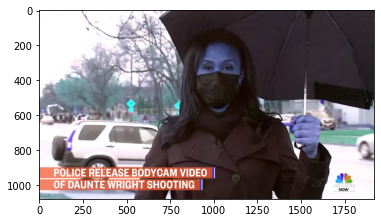

In [17]:
plt.imshow(img1)

In [18]:
result

'   \n\nOLICE REL DYCAM VIDEO |\nOF DAUNTE SHOOTING |\n\n \n\x0c'

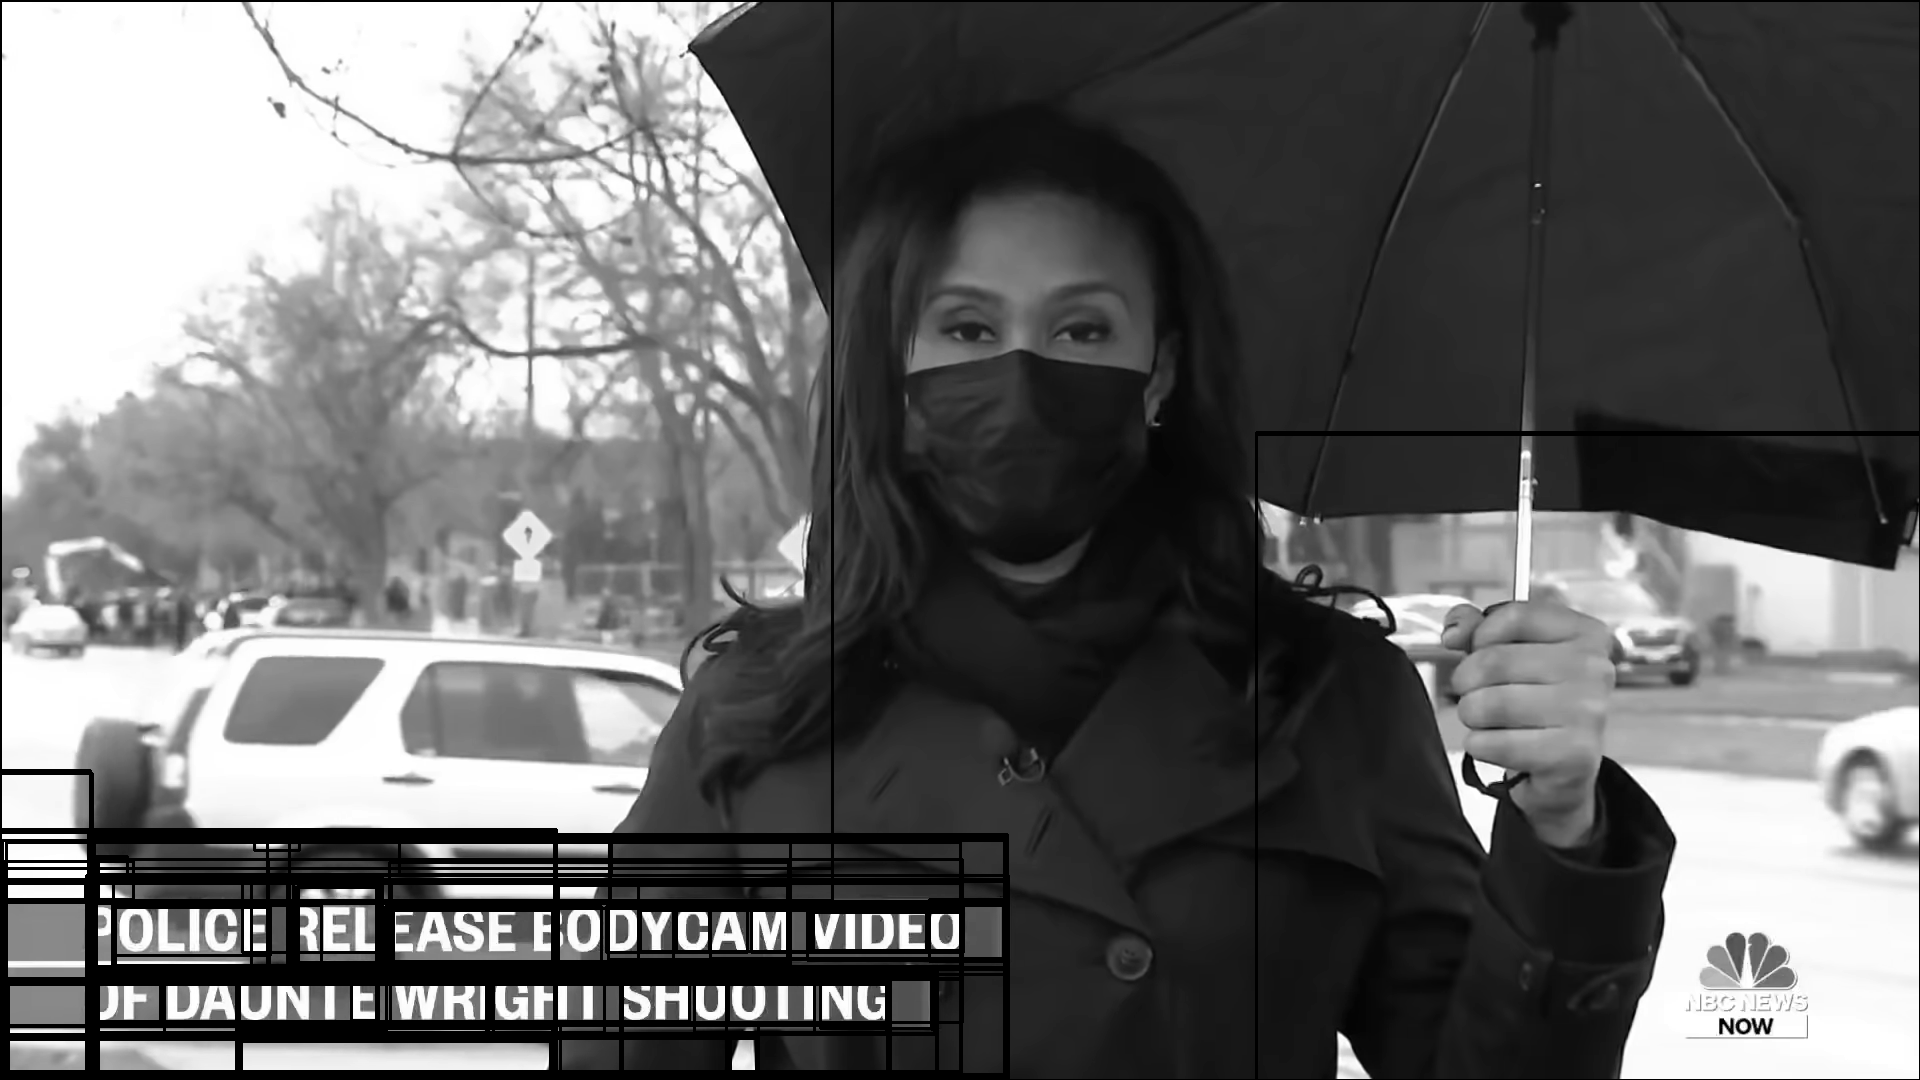

-1

In [28]:
from google.colab.patches import cv2_imshow
d = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)
n_boxes = len(d["level"])
for i in range(n_boxes):
    (x, y, w, h) = (d["left"][i], d["top"][i], d["width"][i], d["height"][i])
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 255), 2)
cv2_imshow(img)
cv2.waitKey(0)

In [46]:
frame = 0
while True:
    it_worked, img = vidcap.read()
    if not it_worked:
        break
        frame += 1
        img_name = f"{video_name}_frame{frame}"
        text = get_string(img)
        cv2.putText(img, text, (0,50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,0,0), thickness=2)
        d = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)
        n_boxes = len(d["level"])
        for i in range(n_boxes):
            (x, y, w, h) = (d["left"][i], d["top"][i], d["width"][i], d["height"][i])
            cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 255), 2)
        cv2_imshow(img)
    output_video.write(img)
output_video.release()
if os.path.exists(output_path):
    os.remove(output_path)
subprocess.run(["ffmpeg", "-i", tmp_output_path, "-crf", "18", "-preset", "veryfast", "-vcodec", "libx264", output_path])
os.remove(tmp_output_path)

In [47]:
!ls

labeled_news.mp4.mkv  news.mp4.mkv  sample_data  temp.png  thres.png


In [48]:
from IPython.display import HTML, display
from base64 import b64encode

In [50]:
mp4 = open("news.mp4.mkv", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML("""
<video width=400 controls>
    <source src=%s type="video/mp4">
    </video>
    """% data_url)